# Θεωρία Πληροφορίας - 9ο Εξάμηνο

## 3η Σειρά Ασκήσεων 2023 - 2024

Ονοματεπώνυμο: Ειρήνη Δόντη

Α.Μ.: 03119839

### Άσκηση 1

2.

In [8]:
from math import log

probs = [
    [1/5, 3/4, 1/20],
    [3/5, 3/10, 1/10],
    [5/12, 1/4, 1/3]
]
m1 = 530/1277
m2 = 615/1277
m3 = 132/1277

res = -m1*log(m1,2) - m2*log(m2, 2) -m3*log(m3, 2)
print("H(Xn) = ", round(res,4))

H(Xn) =  1.3726


3.

In [9]:
sum_m1 = sum(probs[0][i]*log(probs[0][i],2) for i in range(3))
sum_m2 = sum(probs[1][i]*log(probs[1][i],2) for i in range(3))
sum_m3 = sum(probs[2][i]*log(probs[2][i],2) for i in range(3))
res = -m1*sum_m1 - m2*sum_m2 - m3*sum_m3
print("Entropy rate = ", round(res,4), "bits")

Entropy rate =  1.1962 bits


### Άσκηση 2

1.

For n = 1:  [0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
For n = 2:  [0.4056, 0.4333, 0.1611]
For n = 3:  [0.4082, 0.4745, 0.1173]
For n = 4:  [0.4152, 0.4778, 0.107]
For n = 5:  [0.4143, 0.4815, 0.1042]
For n = 6:  [0.4152, 0.4812, 0.1036]
For n = 7:  [0.4149, 0.4817, 0.1034]
For n = 8:  [0.4151, 0.4815, 0.1034]
For n = 9:  [0.415, 0.4816, 0.1034]
For n = 10:  [0.415, 0.4816, 0.1034]
P(Xn = 1): [0.3333333333333333, 0.4056, 0.4082, 0.4152, 0.4143, 0.4152, 0.4149, 0.4151, 0.415, 0.415]
P(Xn = 2): [0.3333333333333333, 0.4333, 0.4745, 0.4778, 0.4815, 0.4812, 0.4817, 0.4815, 0.4816, 0.4816]
P(Xn = 3): [0.3333333333333333, 0.1611, 0.1173, 0.107, 0.1042, 0.1036, 0.1034, 0.1034, 0.1034, 0.1034]


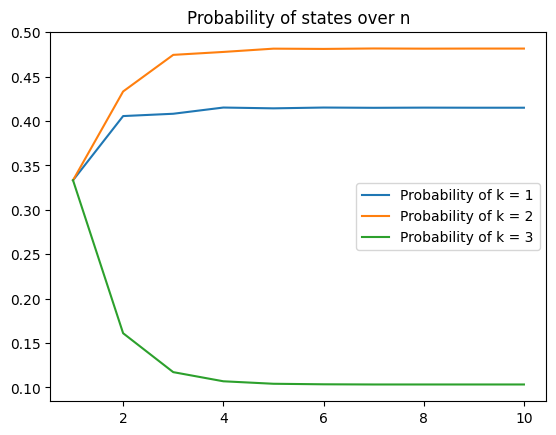

In [10]:
import matplotlib.pyplot as plt
from math import log
from itertools import permutations, product

state_probs = [
    [1/3,1/3,1/3],
]

for n in range(1, 10):
    next_probs = [0, 0, 0]
    for k in range(3):
        next_probs[k] = round(sum(state_probs[n-1][i]*probs[i][k] for i in range(3)),4)
    state_probs.append(next_probs)
for i, state in enumerate(state_probs):
    print(f"For n = {i+1}: ", state)

probs_1 = [i[0] for i in state_probs]
probs_2 = [i[1] for i in state_probs]
probs_3 = [i[2] for i in state_probs]
print("P(Xn = 1):", probs_1)
print("P(Xn = 2):",probs_2)
print("P(Xn = 3):",probs_3)
n_values = [(i+1) for i in range(10)]

# Create plot to show how the probabilities change overtime

plt.plot(n_values, probs_1, label="Probability of k = 1")
plt.plot(n_values, probs_2, label="Probability of k = 2")
plt.plot(n_values, probs_3, label="Probability of k = 3")
plt.legend()
plt.title("Probability of states over n")
plt.show()


2.

For n = 1: H(Xn) =  1.585
For n = 2: H(Xn) =  1.4752
For n = 3: H(Xn) =  1.4007
For n = 4: H(Xn) =  1.3806
For n = 5: H(Xn) =  1.3743
For n = 6: H(Xn) =  1.3732
For n = 7: H(Xn) =  1.3727
For n = 8: H(Xn) =  1.3727
For n = 9: H(Xn) =  1.3727
For n = 10: H(Xn) =  1.3727


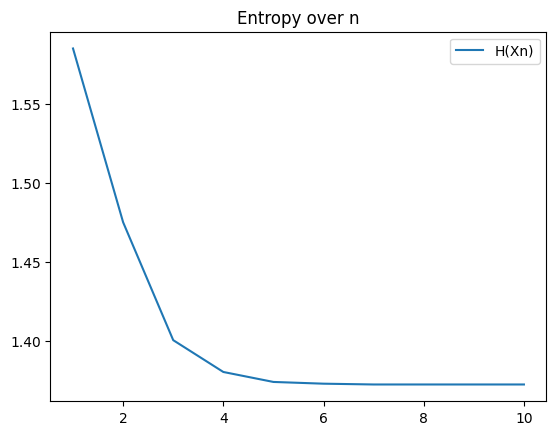

In [11]:
entropy_array = []
for n, state in enumerate(state_probs):
    entropy = round(-sum(i*log(i,2) for i in state if i != 0),4)
    print(f"For n = {n+1}: H(Xn) = ", entropy)
    entropy_array.append(entropy)

plt.plot(n_values, entropy_array, label="H(Xn)")
plt.legend()
plt.title("Entropy over n")
plt.show()

3.

For n = 1, H(X1, ... ,Xn)/n = 0.0 bits
For n = 2, H(X1, ... ,Xn)/n = 0.6477 bits
For n = 3, H(X1, ... ,Xn)/n = 0.8115 bits
For n = 4, H(X1, ... ,Xn)/n = 0.9126 bits
For n = 5, H(X1, ... ,Xn)/n = 0.9675 bits
For n = 6, H(X1, ... ,Xn)/n = 1.0062 bits
For n = 7, H(X1, ... ,Xn)/n = 1.0331 bits
For n = 8, H(X1, ... ,Xn)/n = 1.0536 bits
For n = 9, H(X1, ... ,Xn)/n = 1.0694 bits
For n = 10, H(X1, ... ,Xn)/n = 1.0821 bits


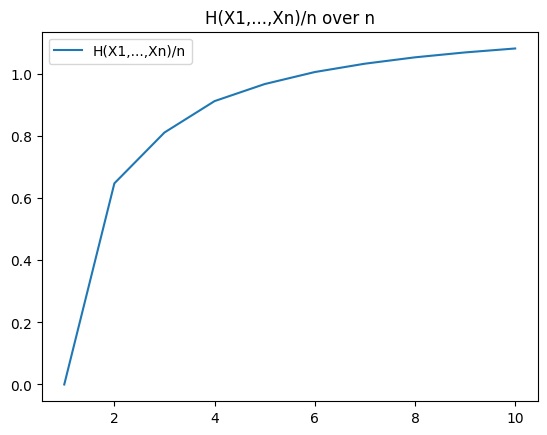

In [12]:
def calctermsequence(perm, probs):
    if perm[0] != 2:
        return 0
    prob = 1
    for idx, cur_state in enumerate(perm[1:]):
        prev_state = perm[idx]
        prob *= probs[prev_state-1][cur_state-1]
    return prob*log(prob,2)

res_array = []

for n in range(1,11):
    s = 0
    for perm in product([1,2,3], repeat=n):
        s += calctermsequence(perm, probs)
    if(s == 0): res = 0.0
    else: res = round(-s/n, 4)
    print(f"For n = {n}, H(X1, ... ,Xn)/n = {res} bits")
    res_array.append(res)

plt.plot(n_values, res_array, label="H(X1,...,Xn)/n")
plt.legend()
plt.title("H(X1,...,Xn)/n over n")
plt.show()
